In [1]:
import networkx as nx
import scipy.stats as stat
import statistics
import copy
import random
import matplotlib.pyplot as plt

In [23]:
# Input parameters of epidemic

transmissibility = 0.005
duration = 14
population = 1000
households = 300
average_links = 20
social_distance_links = 10

In [3]:
def ave_deg(G):
    return(len(G.edges())/len(G.nodes()))

In [4]:
def create_hh_graph(pop,hh):
    mean_size = pop/hh
    hh_array = []
    node =0
    G = nx.Graph()
    hh_links = []
    while sum(hh_array) < pop:
        v = stat.poisson.rvs(mean_size)
        if v>0:
            hh_array.append(v)
    node = 0
    G = nx.Graph()
    hh_links = []
    for h in hh_array:
        for i in range(h):
            for j in range(h):
                if i<j:
                    G.add_edge(i+node,j+node)
                    hh_links.append([i+node,j+node])
        node+=h
    return(G,hh_array)

In [5]:
def add_edges(Graph,p):
    G2 = copy.deepcopy(Graph)
    G2_nodes = list(G2.nodes())
    added_edges = []
    while ave_deg(G2)<p:
        i = random.choice(G2_nodes)
        j = random.choice(G2_nodes)
        if i!=j and G.has_edge(min(i,j),max(i,j)) == 0:
            G2.add_edge(i,j)
            added_edges.append([i,j])
    return(G2,added_edges)

In [6]:
def remove_edges(Graph,ae,p):
    G3 = copy.deepcopy(Graph)
    added_edges = copy.deepcopy(ae)
    while ave_deg(G3)>p and len(added_edges)>0:
        a_ij = random.choice(added_edges)
        del added_edges[added_edges.index(a_ij)]
        i = min(a_ij)
        j = max(a_ij)
        if G3.has_edge(i,j):
            try:
                G3.remove_edge(i,j)
            except:
                pass
    return(G3,added_edges)

In [71]:
def percolate(Graph,tau,trans):
    s,i,r=list(Graph.nodes()),{},[]
    s_hist,i_hist,r_hist,days = [],[],[],[]
    patient_0 = random.choice(s)
    del s[s.index(patient_0)]
    i[patient_0] = [tau,list(Graph.neighbors(patient_0))]
    while len(i) > 0:
        days.append(len(days)+1)
        recoveries = []
        infections = []
        for  k,v in i.items():
            if v[0] == 0:
                recoveries.append(k)
            else:
                i[k][0] -=1
                for n in v[1]:
                    if random.random()<trans and n in s \
                            and n not in infections:
                        infections.append(n)
        for n in recoveries:
            del i[n]
            r.append(n)
        for n in infections:
            i[n] = [stat.poisson.rvs(tau),list(Graph.neighbors(n))]
            del s[s.index(n)]
        s_hist.append(len(s))
        i_hist.append(len(i))
        r_hist.append(len(r))
    plt.plot(days,s_hist)
    plt.plot(days,i_hist)
    plt.plot(days,r_hist)
    plt.show()
    

# todo: change tau from discrete value to poisson value with mean = input

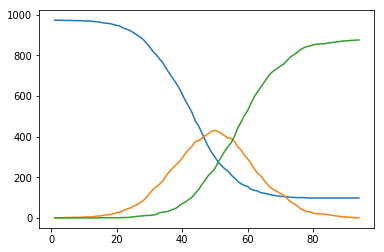

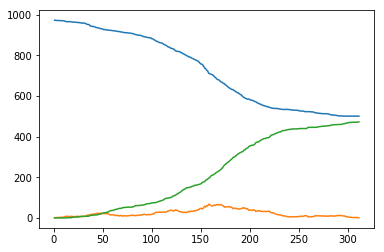

In [72]:
G,hh_array = create_hh_graph(population,households)
ave_deg(G)
G2,added_edges = add_edges(G,average_links)
ave_deg(G2)
G3,added_edges3 = remove_edges(G2,added_edges,social_distance_links)
ave_deg(G3)


percolate(G2,duration,transmissibility)
percolate(G3,duration,transmissibility)